## Importing packages

In [1]:
# Chargement des packages
#%pip install wordcloud
#%pip install tweepy
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Load dataset

In [4]:
import shutil
import os

# Créer le répertoire kaggle
portfolio_dir = "C:/Users/HP/Portofolio Data Arielle/kaggle"
os.makedirs(portfolio_dir, exist_ok=True)

# Copier le fichier kaggle.json vers le répertoire kaggle
shutil.copy("kaggle.json", portfolio_dir)

# Définir les autorisations sur le fichier kaggle.json
os.system(r"icacls C:\Users\HP\Portofolio Data Arielle\kaggle\kaggle.json /inheritance:r")
os.system(r"icacls C:\Users\HP\Portofolio Data Arielle\kaggle\kaggle.json /grant:r %USERNAME%:(R)")

87

In [5]:
#API to fetch the dataset
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other




  0%|          | 0.00/25.7M [00:00<?, ?B/s]
  4%|3         | 1.00M/25.7M [00:00<00:19, 1.30MB/s]
  8%|7         | 2.00M/25.7M [00:01<00:14, 1.67MB/s]
 12%|#1        | 3.00M/25.7M [00:01<00:12, 1.91MB/s]
 16%|#5        | 4.00M/25.7M [00:02<00:11, 2.04MB/s]
 19%|#9        | 5.00M/25.7M [00:02<00:10, 2.07MB/s]
 23%|##3       | 6.00M/25.7M [00:03<00:09, 2.15MB/s]
 27%|##7       | 7.00M/25.7M [00:03<00:09, 2.16MB/s]
 31%|###1      | 8.00M/25.7M [00:04<00:08, 2.18MB/s]
 35%|###5      | 9.00M/25.7M [00:04<00:08, 2.19MB/s]
 39%|###8      | 10.0M/25.7M [00:05<00:07, 2.21MB/s]
 43%|####2     | 11.0M/25.7M [00:05<00:07, 2.02MB/s]
 47%|####6     | 12.0M/25.7M [00:06<00:07, 2.05MB/s]
 51%|#####     | 13.0M/25.7M [00:06<00:06, 2.07MB/s]
 54%|#####4    | 14.0M/25.7M [00:07<00:05, 2.12MB/s]
 58%|#####8    | 15.0M/25.7M [00:07<00:05, 2.13MB/s]
 62%|######2   | 16.0M/25.7M [00:08<00:06, 1.52MB/s]
 66%|######6   | 17.0M/25.7M [00:09<00:07, 1.27MB/s]
 70%|#######   | 18.0M/25.7M [00:10<00:06, 1.34MB/s]
 

In [7]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset='imdb-dataset-of-50k-movie-reviews.zip'

with ZipFile(dataset,'r') as zip:
    zip.extractall()
    print('the dataset is extracted')

the dataset is extracted


In [9]:
#import the dataset
df=pd.read_csv('IMDB Dataset.csv', encoding='ISO-8859-1')


In [10]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [11]:
df.shape

(50000, 2)

In [14]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [16]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [18]:
df.sentiment.unique()

array(['positive', 'negative'], dtype=object)

## Data Preparation, Tokenization, Stopwords Removal and Stemming

In [21]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["review"] = df["review"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
df.head()

,review,sentiment
0,one review mention watch oz episod youll hook...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there famili littl boy jake think there ...,negative
4,petter mattei love time money visual stun film...,positive


In [31]:
# Remplacer le negatif par 0 et positive par 1

df.loc[df['sentiment'] == 'negative', 'sentiment'] = 0
df.loc[df['sentiment'] == 'positive', 'sentiment'] = 1

# Convertir la colonne 'sentiment' en type entier
df['sentiment'] = df['sentiment'].astype(int)

df.sentiment.unique()

array([1, 0])

In [32]:
df.head()

,review,sentiment
0,one review mention watch oz episod youll hook...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic there famili littl boy jake think there ...,0
4,petter mattei love time money visual stun film...,1


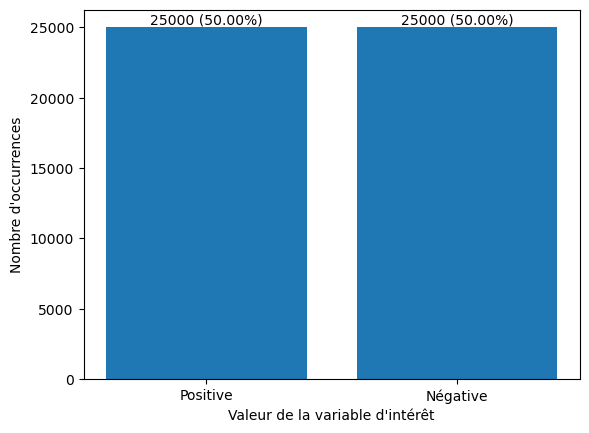

In [33]:
target_counts = df['sentiment'].value_counts()

# Calculer la proportion pour chaque valeur de la variable d'intérêt (target)
target_proportions = df['sentiment'].value_counts(normalize=True)

# Créer un graphique à barres pour visualiser la distribution
plt.bar(target_counts.index, target_counts.values)

# Ajouter les étiquettes des barres (nombre d'occurrences et proportion)
for i, count in enumerate(target_counts):
    proportion = target_proportions[i]
    plt.text(i, count, f"{count} ({proportion:.2%})", ha='center', va='bottom')

# Étiqueter l'axe des x et y
plt.xlabel('Valeur de la variable d\'intérêt')
plt.ylabel('Nombre d\'occurrences')

# Ajouter une légende aux barres
plt.xticks(target_counts.index, ['Négative', 'Positive'])

# Afficher le graphique
plt.show()

In [34]:
#selection des reviews positifs
reviews_positifs = df[df['sentiment'] == 1]

#selection des reviews negatifs
reviews_negatifs = df[df['sentiment'] == 0]

## Generer le wordcloud

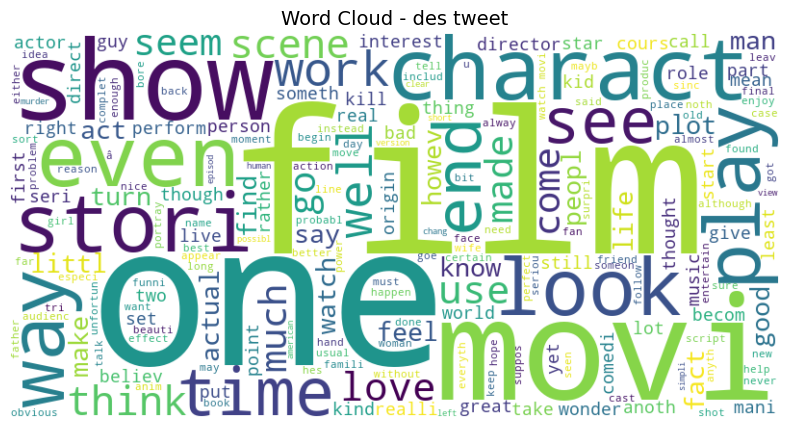

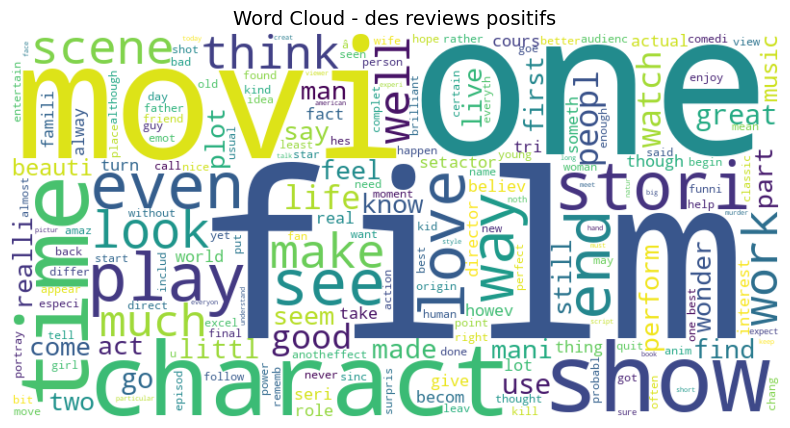

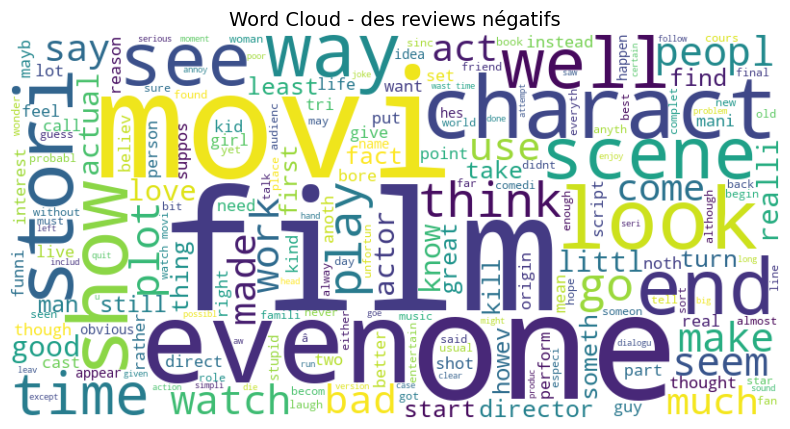

In [36]:
# Fonction pour générer le word cloud
def generer_wordcloud(reviews, titre):
    tout_texte = ' '.join(reviews)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tout_texte)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(titre, fontsize=14)
    plt.axis('off')
    plt.show()

# Générer le word cloud pour chaque type de sentiment
generer_wordcloud(df['review'], 'Word Cloud - des reviews')
generer_wordcloud(reviews_positifs['review'], 'Word Cloud - des reviews positifs')
generer_wordcloud(reviews_negatifs['review'], 'Word Cloud - des reviews négatifs')

## Text Vectorization

In [39]:
import numpy as np
x= np.array(df["review"])
y = np.array(df["sentiment"])

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Créer une instance du vectoriseur TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=2000)

# Appliquer le vectoriseur sur la colonne 'texte_nettoye'
features = vectorizer.fit_transform(x)

# Convertir les caractéristiques en une représentation de matrice creuse
features = features.toarray()

# Afficher les dimensions de la matrice de caractéristiques
print("Dimensions de la matrice de caractéristiques :", features.shape)

Dimensions de la matrice de caractéristiques : (50000, 2000)


In [71]:
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

## Text Classification

In [74]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [75]:
model.score(X_train,y_train)

0.892875

In [76]:
# Prédire les probabilités pour les ensembles d'entraînement et de test
y_train_pred = model.predict_proba(X_train)[:, 1]
y_test_pred = model.predict_proba(X_test)[:, 1]

In [77]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

# Calculer les valeurs de la courbe ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

# Calculer l'AUC pour les ensembles d'entraînement et de test
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

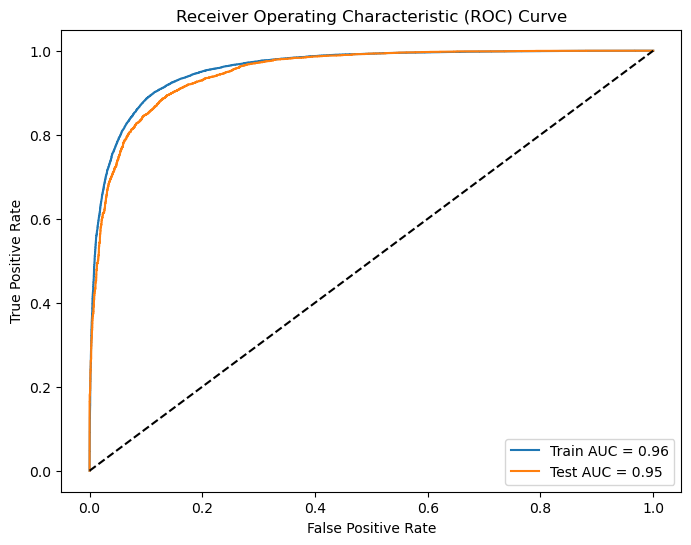

In [78]:
# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train AUC = {:.2f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='Test AUC = {:.2f}'.format(auc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [79]:
# Calculer les performances sur les ensembles d'entraînement et de test
train_accuracy = accuracy_score(y_train, model.predict(X_train))
train_precision = precision_score(y_train, model.predict(X_train))
train_recall = recall_score(y_train, model.predict(X_train))
train_f1 = f1_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
test_precision = precision_score(y_test, model.predict(X_test))
test_recall = recall_score(y_test, model.predict(X_test))
test_f1 = f1_score(y_test, model.predict(X_test))

# Créer un tableau des performances
performance_table = pd.DataFrame({
    'Performance': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1],
    'Test': [test_accuracy, test_precision, test_recall, test_f1]
})

print(performance_table)

  Performance     Train      Test
0    Accuracy  0.892875  0.877800
1   Precision  0.885614  0.869078
2      Recall  0.901809  0.891844
3    F1 Score  0.893638  0.880313


## test the model

In [81]:
import pickle

In [83]:
filename='movie_reviews_model_sav'
pickle.dump(model,open(filename, 'wb'))
pickle.dump(vectorizer,open('vectoriser-save', 'wb'))

In [84]:
#loading the saved model
loaded_model=pickle.load(open('movie_reviews_model_sav', 'rb'))